In [1]:
# Import Libraries
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load Results
results_path = 'results/optics_results.csv'
df = pd.read_csv(results_path)
df.head()

,Dataset,Metric,Algorithm,Min Samples,Silhouette,ARI,DBI,Purity,Num Clusters,Time (s)
0,satimage,chebyshev,ball_tree,2,0.181110,0.020029,1.086353,0.443823,631,37.444479
1,satimage,chebyshev,ball_tree,3,0.141281,0.019670,1.172211,0.366744,158,37.461474
2,satimage,chebyshev,ball_tree,4,0.215085,0.015257,1.251738,0.324786,71,40.339531
3,satimage,chebyshev,ball_tree,5,0.233188,0.013701,1.130669,0.323699,46,40.430531
4,satimage,chebyshev,ball_tree,6,0.309816,0.003489,1.109979,0.340793,29,37.976568


### **Data Preprocessing**

In [3]:
# Convert numerical columns to float
metrics = ['Silhouette', 'ARI', 'DBI', 'Purity', 'Time (s)']
df[metrics] = df[metrics].astype(float)

### **Checking Data Sparsity**

- Sparsity of satimage is (False, 0.0)
- Sparsity of splice is (True, 0.7909407665505227)
- Sparsity of vowel is (True, 0.5517241379310345)

### **1. Obtain Composite Metric**

In [ ]:
import pandas as pd



# Dictionary to store the processed DataFrames
data_dict = {}

# Loop through each dataset
for dataset in datasets:
    # Select only the rows corresponding to the current dataset
    df = df_all[df_all['Dataset'] == dataset].copy()
    
    # Compute the composite metric
    df['Composite Metric'] = (
        df['Silhouette']
        # 0.15 * df['ARI'] +
        # 0.15 * df['Purity'] +
        # 0.15 * df['DBI_Norm'] + 
        # 0.4 * df['Num_Clusters_Norm']
    )
    
    # Store the processed DataFrame in the dictionary
    data_dict[dataset] = df

### **2. Obtain Best OPTICS Configuration**

In [14]:
# Convert numerical columns to float
numeric_cols = ['Silhouette', 'ARI', 'DBI', 'Purity', 'Time (s)']
df_all = pd.read_csv('results/optics_results.csv')
df_all[numeric_cols] = df_all[numeric_cols].astype(float)

# List of datasets
datasets = ['satimage', 'splice', 'vowel']

# Define metrics and whether to maximize them
metrics_info = {
    'Silhouette': True,  # Higher is better
    'ARI': True,         # Higher is better
    'DBI': False,        # Lower is better
    'Purity': True,      # Higher is better
}

# Dictionary to store the best configurations
best_configs = {dataset: {} for dataset in datasets}

for dataset in datasets:
    # Select only the rows corresponding to the current dataset
    df = df_all[df_all['Dataset'] == dataset].copy()

    # Iterate through each metric
    for metric, maximize in metrics_info.items():
        if maximize:
            # Find the row with the maximum metric value
            best_row = df.loc[df[metric].idxmax()]
        else:
            # Find the row with the minimum metric value
            best_row = df.loc[df[metric].idxmin()]

        # Extract the best parameters
        best_metric = best_row['Metric']
        best_algorithm = best_row['Algorithm']
        best_min_samples = best_row['Min Samples']
        best_num_clusters= best_row['Num Clusters']
        best_configs[dataset][metric] = {'Metric': best_metric, 'Algorithm': best_algorithm, 'Min Samples': best_min_samples}

        print(f"Best configuration for {dataset}: Metric={best_metric}, Algorithm={best_algorithm}, Min Samples={best_min_samples}\n\tNum Clusters={best_num_clusters}")
        # Print the best configuration (Overleaf)
        print(f"{metric} & {best_metric} & {best_algorithm} & {best_min_samples} & {best_num_clusters} & {best_row[metric]:.5f}\\\\\n")


Best configuration for satimage: Metric=euclidean, Algorithm=brute, Min Samples=8
	Num Clusters=4
Silhouette & euclidean & brute & 8 & 4 & 0.78028\\

Best configuration for satimage: Metric=euclidean, Algorithm=ball_tree, Min Samples=2
	Num Clusters=648
ARI & euclidean & ball_tree & 2 & 648 & 0.02208\\

Best configuration for satimage: Metric=euclidean, Algorithm=brute, Min Samples=8
	Num Clusters=4
DBI & euclidean & brute & 8 & 4 & 0.32574\\

Best configuration for satimage: Metric=l1, Algorithm=ball_tree, Min Samples=2
	Num Clusters=851
Purity & l1 & ball_tree & 2 & 851 & 0.50645\\

Best configuration for splice: Metric=euclidean, Algorithm=ball_tree, Min Samples=4
	Num Clusters=33
Silhouette & euclidean & ball_tree & 4 & 33 & 0.44728\\

Best configuration for splice: Metric=l1, Algorithm=ball_tree, Min Samples=2
	Num Clusters=280
ARI & l1 & ball_tree & 2 & 280 & 0.18572\\

Best configuration for splice: Metric=euclidean, Algorithm=ball_tree, Min Samples=4
	Num Clusters=33
DBI & eucl

### **4. Scatter Plot**

In [25]:
from sklearn.cluster import OPTICS
from preprocessing import DataLoader, DataProcessor

# Dictionary to store datasets and labels
dataset_labels = {}

METRIC = 'Purity'

for dataset in datasets:
    # Initialize loaders and preprocessors
    data_loader = DataLoader()
    data_processor = DataProcessor()
    
    # Load dataset using custom loader
    data, labels = data_loader.load_arff_data(dataset)
    X = data_processor.preprocess_dataset(data)
    y_true = labels 
    
    # Get best parameters
    best_metric = best_configs[dataset][METRIC]['Metric']
    best_algorithm = best_configs[dataset][METRIC]['Algorithm']
    best_min_samples = int(best_configs[dataset][METRIC]['Min Samples'])
    
    # Apply clustering with best parameters
    y_pred = OPTICS(metric=best_metric, algorithm=best_algorithm, min_samples=best_min_samples).fit_predict(X)
    
    # Store the data and labels
    dataset_labels[dataset] = {'data': X, 'labels': y_pred}

c:\Users\joanc\Desktop\IML\.venv\lib\site-packages\sklearn\cluster\_optics.py:1081: RuntimeWarning: divide by zero encountered in divide
  ratio = reachability_plot[:-1] / reachability_plot[1:]


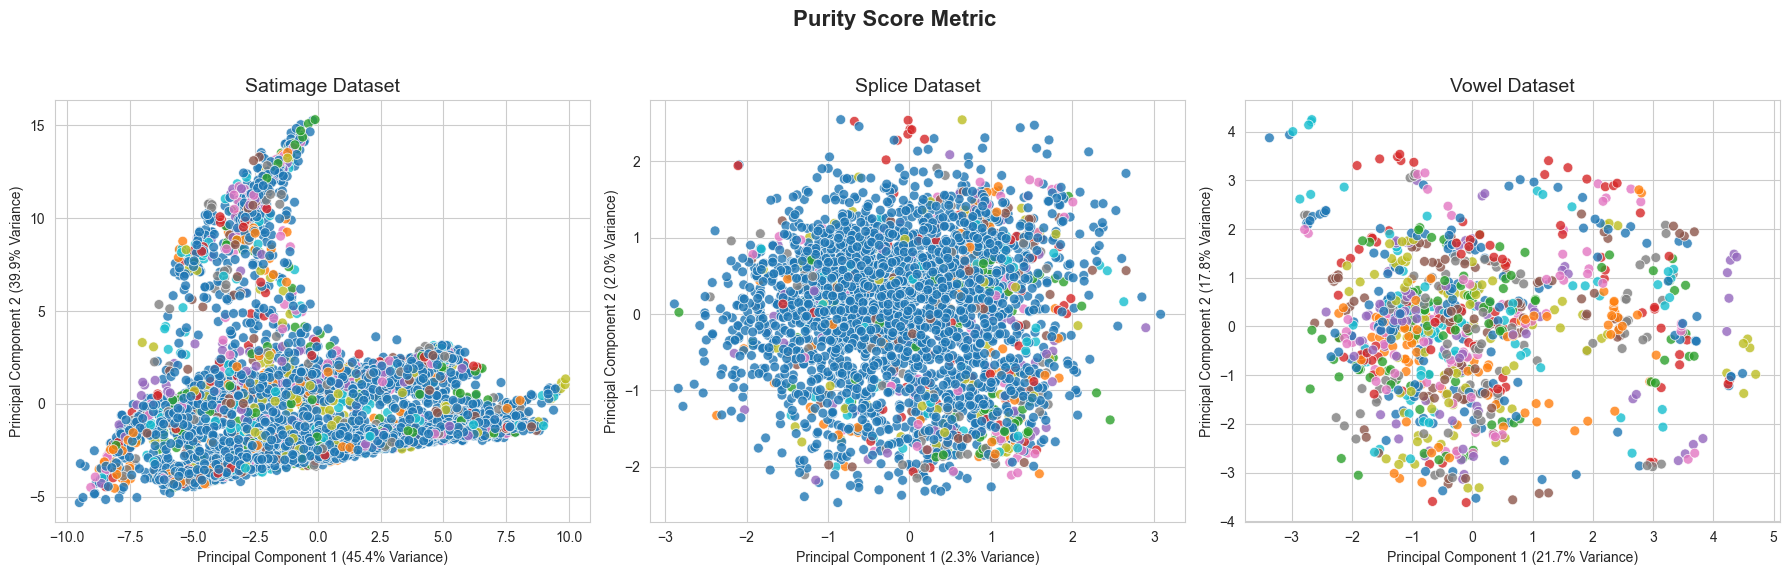

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.decomposition import PCA

# Set seaborn style for better aesthetics
sns.set_style('whitegrid')

# Define full metric names
metric_full_names = {
    'ARI': 'Adjusted Rand Index Metric',
    'DBI': 'Davies-Bouldin Index Metric',
    'Silhouette': 'Silhouette Score Metric',
    'Purity': 'Purity Score Metric'
}

# Prepare the figure with 3 subplots in a row and increased space between plots
fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharey=False)

for idx, dataset in enumerate(datasets):
    # Retrieve data and labels
    data = dataset_labels[dataset]['data']
    labels = dataset_labels[dataset]['labels']
    
    # Apply PCA
    pca = PCA(n_components=2)
    data_reduced = pca.fit_transform(data)
    
    # Calculate the percentage of variance explained by each component
    variance_ratio = pca.explained_variance_ratio_
    pc1_var = variance_ratio[0] * 100
    pc2_var = variance_ratio[1] * 100
    
    # Create a DataFrame for plotting
    plot_df = pd.DataFrame(data_reduced, columns=['Principal Component 1', 'Principal Component 2'])
    plot_df['Cluster'] = labels.astype(str)
    
    # Ensure the legend is ordered with clusters appearing first and '...' last if it exists
    unique_clusters = plot_df['Cluster'].value_counts().index.tolist()
    plot_df['Cluster'] = pd.Categorical(plot_df['Cluster'], categories=unique_clusters, ordered=True)
    
    # Plot
    ax = axes[idx]
    sns.scatterplot(
        data=plot_df,
        x='Principal Component 1',
        y='Principal Component 2',
        hue='Cluster',
        palette='tab10',
        ax=ax,
        s=50,
        alpha=0.8,
        legend=False
    )
    ax.set_title(f'{dataset.capitalize()} Dataset', fontsize=14)
    
    # Update axis labels to include percentage of variance explained
    ax.set_xlabel(f'Principal Component 1 ({pc1_var:.1f}% Variance)')
    ax.set_ylabel(f'Principal Component 2 ({pc2_var:.1f}% Variance)')

# Set the subtitle for the entire figure
fig.suptitle(f'{metric_full_names[METRIC]}', fontsize=16, fontweight='bold')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Adjust layout to accommodate the suptitle
plt.show()

In [50]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns  # Import seaborn
from sklearn.cluster import OPTICS
from sklearn.decomposition import PCA
from preprocessing import DataLoader, DataProcessor
import os

# Set seaborn style for better aesthetics
sns.set_style('whitegrid')

# Define full metric names
metric_full_names = {
    'ARI': 'Adjusted Rand Index Metric',
    'DBI': 'Davies-Bouldin Index Metric',
    'Silhouette': 'Silhouette Score Metric',
    'Purity': 'Purity Score Metric'
}

# Define the order of metrics for plotting
metrics_order = ['ARI', 'DBI', 'Silhouette', 'Purity']

# Define whether to maximize each metric
metrics_info = {
    'ARI': True,         # Higher is better
    'DBI': False,        # Lower is better
    'Silhouette': True,  # Higher is better
    'Purity': True       # Higher is better
}

def visualize_pca_all_datasets(best_configs, datasets, output_dir='pca_plots'):
    """
    Visualizes PCA plots for all datasets and metrics, and combines them into a single image.
    
    Parameters:
    - best_configs (dict): Nested dictionary containing best configurations per dataset and metric.
    - datasets (list): List of dataset names.
    - output_dir (str): Directory to save the PCA plots.
    
    Returns:
    - None
    """
    
    # Initialize loaders and preprocessors once
    data_loader = DataLoader()
    data_processor = DataProcessor()
    
    # Initialize PCA (2 components)
    pca = PCA(n_components=2)

    # Define the layout for the final combined image
    num_datasets = len(datasets)

    # Create a figure with enough subplots
    # Each dataset has a 2x2 grid, arranged horizontally
    fig, axs = plt.subplots(nrows=2, ncols=2 * num_datasets, figsize=(10 * num_datasets, 10))

    # Adjust layout spacing
    plt.subplots_adjust(wspace=0.4, hspace=0.4)
    
    # Add main title
    fig.suptitle("PCA Clustering Results for All Datasets (2x2 Per Dataset)", fontsize=16)
    
    for ds_idx, dataset in enumerate(datasets):
        # Load dataset using custom loader
        data, _ = data_loader.load_arff_data(dataset)
        X = data_processor.preprocess_dataset(data)
        
        # Retrieve all metrics for the specified dataset
        dataset_metrics = best_configs[dataset]
        
        for metric_idx, metric in enumerate(metrics_order):
            ax = axs[metric_idx // 2, ds_idx * 2 + metric_idx % 2]
            
            config = dataset_metrics[metric]
            
            # Extract OPTICS parameters
            try:
                best_metric = config['Metric']
                best_algorithm = config['Algorithm']
                best_min_samples = config['Min Samples']
            except KeyError as e:
                print(f"Missing parameter {e} in best_configs for dataset '{dataset}' and metric '{metric}'. Skipping.")
                ax.axis('off')
                continue

            # Apply OPTICS with best parameters
            try:
                optics = OPTICS(metric=best_metric, algorithm=best_algorithm, min_samples=best_min_samples, n_jobs=1)
                y_pred = optics.fit_predict(X)
            except Exception as e:
                print(f"Error applying OPTICS for dataset '{dataset}' and metric '{metric}': {e}")
                ax.axis('off')
                continue
            
            # Perform PCA
            try:
                X_pca = pca.fit_transform(X)
            except Exception as e:
                print(f"Error performing PCA for dataset '{dataset}' and metric '{metric}': {e}")
                ax.axis('off')
                continue

            # Calculate the percentage of variance explained by each component
            variance_ratio = pca.explained_variance_ratio_
            pc1_var = variance_ratio[0] * 100
            pc2_var = variance_ratio[1] * 100
            
            # Plotting using seaborn's scatterplot
            try:
                sns.scatterplot(
                    x=X_pca[:, 0],
                    y=X_pca[:, 1],
                    hue=y_pred,
                    palette='tab10',
                    ax=ax,
                    s=50, alpha=0.8,
                    legend=False  # Disable legend for individual subplots
                )
            except Exception as e:
                print(f"Error plotting scatterplot for dataset '{dataset}' and metric '{metric}': {e}")
                ax.axis('off')
                continue

            ax.set_title(metric_full_names.get(metric, metric), fontsize=12)

            # Update axis labels to include percentage of variance explained
            ax.set_xlabel(f'Principal Component 1 ({pc1_var:.1f}% Variance)')
            ax.set_ylabel(f'Principal Component 2 ({pc2_var:.1f}% Variance)')
    
        # Add dataset title spanning its 2 columns
        fig.text((ds_idx + 0.5) / num_datasets, 0.9, f'{dataset.capitalize()} Dataset', ha='center', va='center', fontsize=14, fontweight='bold')
        
    # Optionally, add a single legend for all subplots
    # Create a separate axes for the legend
    handles, labels = ax.get_legend_handles_labels()
    if handles:
        fig.legend(handles, labels, loc='upper right', title='Clusters')
    
    # Show the combined figure
    plt.tight_layout(rect=[0, 0, 1, 0.93])  # Adjust rect to make room for the main title and legend
    plt.show()

c:\Users\joanc\Desktop\IML\.venv\lib\site-packages\sklearn\cluster\_optics.py:1081: RuntimeWarning: divide by zero encountered in divide
  ratio = reachability_plot[:-1] / reachability_plot[1:]
c:\Users\joanc\Desktop\IML\.venv\lib\site-packages\sklearn\cluster\_optics.py:1081: RuntimeWarning: divide by zero encountered in divide
  ratio = reachability_plot[:-1] / reachability_plot[1:]


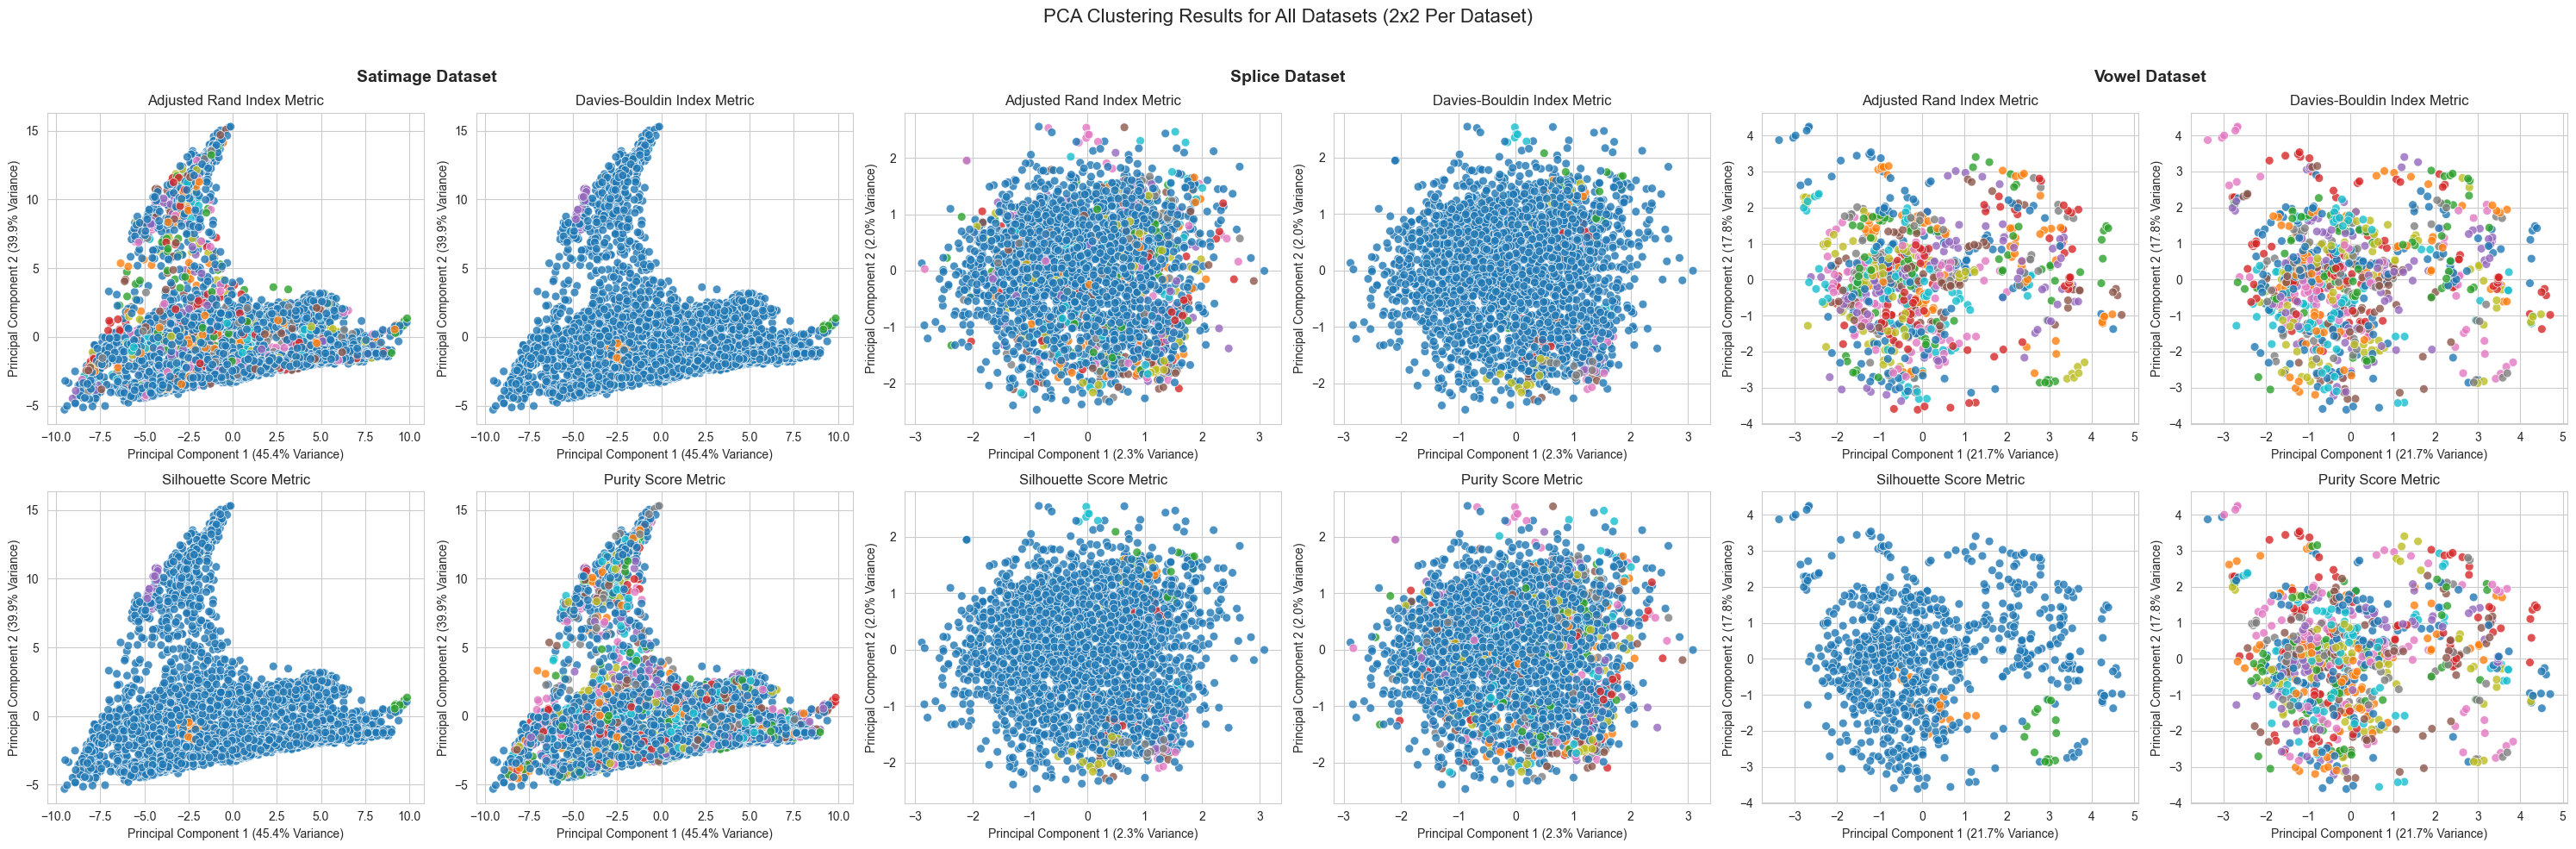

In [51]:
visualize_pca_all_datasets(best_configs, ['satimage', 'splice', 'vowel'])

### **5. Confusion Matrix**

In [48]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import SpectralClustering
from sklearn.metrics import confusion_matrix
from scipy.optimize import linear_sum_assignment
import numpy as np
import os
from preprocessing import DataLoader, DataProcessor

# Define full metric names
metric_full_names = {
    'ARI': 'Adjusted Rand Index Metric',
    'DBI': 'Davies-Bouldin Index Metric',
    'Silhouette': 'Silhouette Score Metric',
    'Purity': 'Purity Score Metric'
}

# Define the order of metrics for plotting
metrics_order = ['ARI', 'DBI', 'Silhouette', 'Purity']

# Define whether to maximize each metric
metrics_info = {
    'ARI': True,         # Higher is better
    'DBI': False,        # Lower is better
    'Silhouette': True,  # Higher is better
    'Purity': True       # Higher is better
}

def visualize_confusion_matrices_all_datasets(best_configs, datasets, output_dir='confusion_matrices'):
    """
    Visualizes confusion matrices for all datasets and metrics, and combines them into a single image.
    
    Parameters:
    - best_configs (dict): Nested dictionary containing best configurations per dataset and metric.
    - datasets (list): List of dataset names.
    - output_dir (str): Directory to save the confusion matrix plots.
    
    Returns:
    - None
    """
    # Create output directory if it doesn't exist
    os.makedirs(output_dir, exist_ok=True)

    # Initialize loaders and preprocessors once
    data_loader = DataLoader()
    data_processor = DataProcessor()

    # Initialize figure and axes
    num_datasets = len(datasets)
    metrics_per_dataset = len(metrics_order)

    # Create a figure with enough subplots
    # Each dataset has a 2x2 grid, arranged horizontally
    fig, axs = plt.subplots(nrows=2, ncols=2 * num_datasets, figsize=(10 * num_datasets, 10))

    # Adjust layout spacing
    plt.subplots_adjust(wspace=0.4, hspace=0.4)

    # Add main title
    fig.suptitle("Confusion Matrices for All Datasets (2x2 Per Dataset)", fontsize=16)

    for ds_idx, dataset in enumerate(datasets):
        # Load dataset using custom loader
        data, labels = data_loader.load_arff_data(dataset)
        X = data_processor.preprocess_dataset(data)
        y_true = labels

        # Retrieve all metrics for the specified dataset
        if dataset not in best_configs:
            print(f"Dataset '{dataset}' not found in best_configs. Skipping.")
            continue

        dataset_metrics = best_configs[dataset]

        for metric_idx, metric in enumerate(metrics_order):
            ax = axs[metric_idx // 2, ds_idx * 2 + metric_idx % 2]

            # Check if metric configuration exists
            if metric not in dataset_metrics:
                print(f"Metric '{metric}' not found for dataset '{dataset}'. Skipping.")
                ax.axis('off')
                continue

            config = dataset_metrics[metric]

            # Extract OPTICS parameters
            try:
                best_metric = config['Metric']
                best_algorithm = config['Algorithm']
                best_min_samples = config['Min Samples']
            except KeyError as e:
                print(f"Missing parameter {e} in best_configs for dataset '{dataset}' and metric '{metric}'. Skipping.")
                ax.axis('off')
                continue

            # Apply OPTICS with best parameters
            try:
                optics = OPTICS(metric=best_metric, algorithm=best_algorithm, min_samples=best_min_samples, n_jobs=1)
                y_pred = optics.fit_predict(X)
            except Exception as e:
                print(f"Error applying SpectralClustering for dataset '{dataset}' and metric '{metric}': {e}")
                ax.axis('off')
                continue

            # Compute confusion matrix
            try:
                # Map true labels and predicted labels to consecutive integers
                y_true_unique = np.unique(y_true)
                y_pred_unique = np.unique(y_pred)

                y_true_mapping = {label: idx for idx, label in enumerate(y_true_unique)}
                y_pred_mapping = {label: idx for idx, label in enumerate(y_pred_unique)}

                y_true_mapped = np.array([y_true_mapping[label] for label in y_true])
                y_pred_mapped = np.array([y_pred_mapping[label] for label in y_pred])

                # Compute confusion matrix
                cm = confusion_matrix(y_true_mapped, y_pred_mapped)

                # Apply the Hungarian algorithm to find the best assignment
                cost_matrix = cm.max() - cm  # Convert to cost matrix for maximization
                row_ind, col_ind = linear_sum_assignment(cost_matrix)

                # Reorder the confusion matrix
                cm_reordered = cm[:, col_ind]

                # Remove rows and columns that sum to 0
                non_zero_rows = np.any(cm_reordered > 0, axis=1)
                non_zero_cols = np.any(cm_reordered > 0, axis=0)
                cm_reordered = cm_reordered[non_zero_rows, :][:, non_zero_cols]

                # Normalize confusion matrix to [0,1]
                cm_row_sums = cm_reordered.sum(axis=1, keepdims=True)
                cm_row_sums[cm_row_sums == 0] = 1  # Avoid division by zero
                cm_normalized = cm_reordered.astype('float') / cm_row_sums

                # Generate labels for heatmap axes
                true_labels_names = [str(y_true_unique[i]) for i in range(len(y_true_unique)) if non_zero_rows[i]]
                pred_labels_names = [str(y_pred_unique[col_ind[j]]) for j in range(len(col_ind)) if non_zero_cols[j]]

                # Plot confusion matrix
                sns.heatmap(cm_normalized, annot=True, fmt='.2f', cmap='Blues', ax=ax,
                            xticklabels=pred_labels_names, yticklabels=true_labels_names, cbar=False)
                ax.set_title(metric_full_names.get(metric, metric), fontsize=12, fontweight='bold')
                ax.set_xlabel('Predicted Cluster')
                ax.set_ylabel('True Label')
            except Exception as e:
                print(f"Error computing or plotting confusion matrix for dataset '{dataset}' and metric '{metric}': {e}")
                ax.axis('off')
                continue

        # Add dataset title spanning its 2 columns
        fig.text((ds_idx + 0.5) / num_datasets, 0.9, f'{dataset.capitalize()} Dataset', ha='center', va='center', fontsize=14, fontweight='bold')

    # Save the combined figure
    combined_plot_path = os.path.join(output_dir, "combined_confusion_matrices.png")
    plt.tight_layout(rect=[0, 0, 1, 0.93])  # Adjust rect to make room for the main title
    plt.savefig(combined_plot_path)
    print(f"Saved combined confusion matrix plot for all datasets at '{combined_plot_path}'.")
    plt.show()


c:\Users\joanc\Desktop\IML\.venv\lib\site-packages\sklearn\cluster\_optics.py:1081: RuntimeWarning: divide by zero encountered in divide
  ratio = reachability_plot[:-1] / reachability_plot[1:]
c:\Users\joanc\Desktop\IML\.venv\lib\site-packages\sklearn\cluster\_optics.py:1081: RuntimeWarning: divide by zero encountered in divide
  ratio = reachability_plot[:-1] / reachability_plot[1:]


Saved combined confusion matrix plot for all datasets at 'confusion_matrices\combined_confusion_matrices.png'.


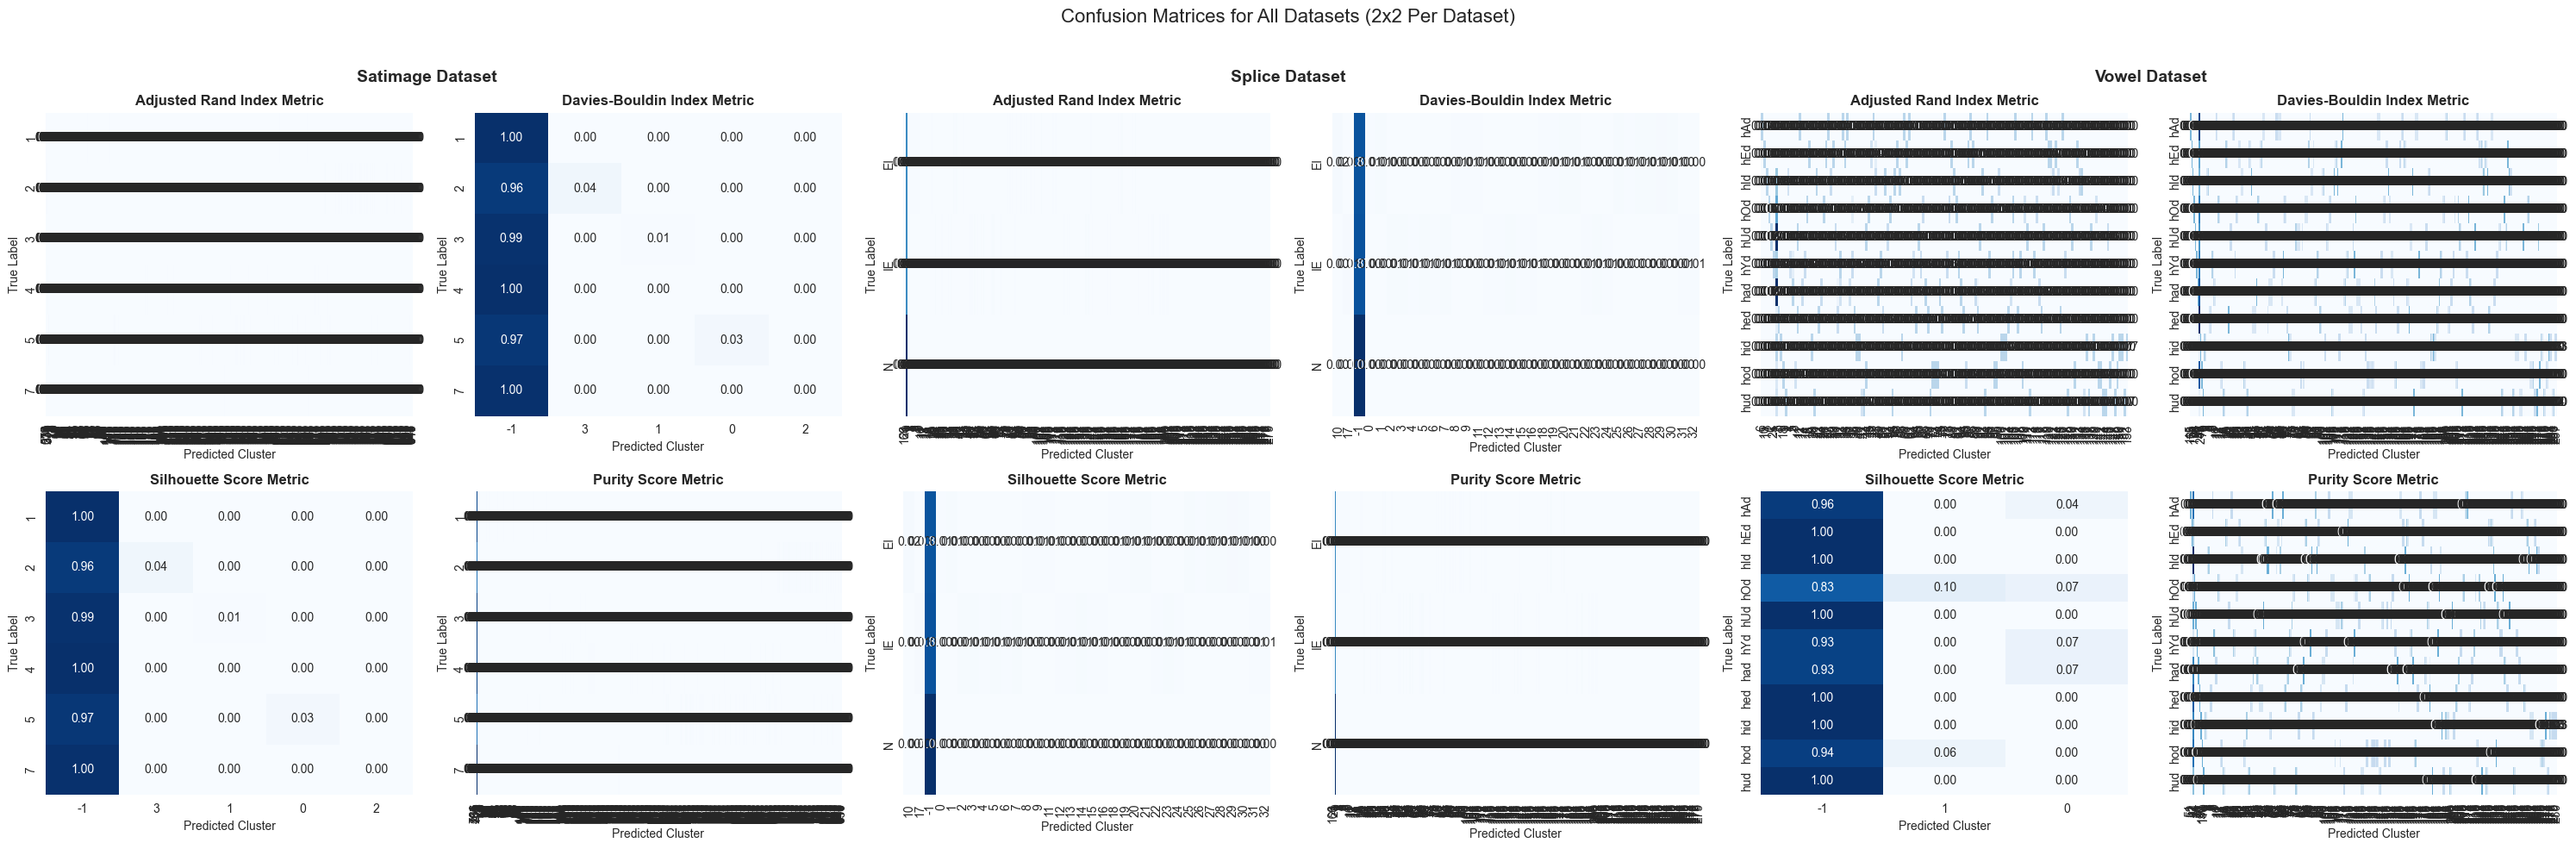

In [49]:
visualize_confusion_matrices_all_datasets(best_configs, ['satimage', 'splice', 'vowel'])